# Identification of Markers of Neuroblastoma Differentiation using a Boolean Implication Network

Peter E. Zage1*, Yuchen Huo1, Jacqueline Lesperance1, Pradipta Ghosh2,3,4* and Debashis Sahoo1,5*

In [2]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon")
sys.path.append("../")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

## Scatterplots and StepMiner plots

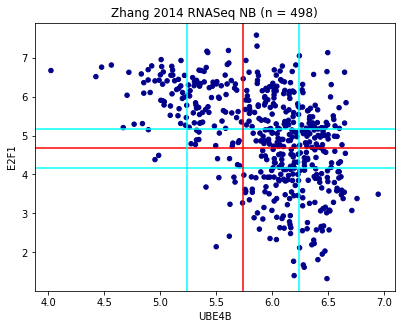

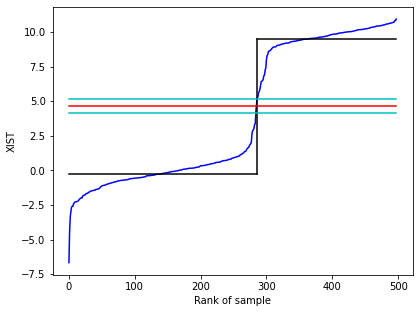

In [4]:
#obj = hu.getHegemonPlots("NB4", "UBE4B", "MYCN")
#ax = hu.plotBooleanPair(obj[0])
#ax.set_xlim([4.5, 7])
#ax.set_ylim([3, 12])
#obj = hu.getHegemonPlots("NB4", "UBE4B", "PGK1")
#ax = hu.plotBooleanPair(obj[0])
#obj = hu.getHegemonPlots("NB4", "UBE4B", "RPLP0")
#ax = hu.plotBooleanPair(obj[0])
#obj = hu.getHegemonPlots("NB4", "UBE4B", "RPL13A")
#ax = hu.plotBooleanPair(obj[0])
#obj = hu.getHegemonPlots("NB4", "TYROBP", "FCER1G")
#ax = hu.plotBooleanPair(obj[0])
#obj = hu.getHegemonPlots("NB4", "UBE4B", "RPL22L1")
#ax = hu.plotBooleanPair(obj[0])
#obj = hu.getHegemonPlots("NB4", "UBE4B", "HAP1")
#ax = hu.plotBooleanPair(obj[0])
#obj = hu.getHegemonPlots("NB4", "MYCN", "MPZ")
#ax = hu.plotBooleanPair(obj[0])
#ax.set_xlim([3, 12])
#obj = hu.getHegemonPlots("NB4", "MYCN", "CENPA")
#ax = hu.plotBooleanPair(obj[0])
#ax.set_xlim([3, 12])
obj = hu.getHegemonPlots("NB4", "UBE4B", "E2F1")
ax = hu.plotBooleanPair(obj[0])
obj = hu.getHegemonPlots("NB4", "XIST", "UBE4B")
ax = hu.plotStepMiner(obj[0])

TARGET NBL 2013 (n = 249)
TARGET PMID:23334666 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NB12
183 [170, 13] TARGET PMID:23334666 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=NB12 NB12
U vs D 4.86, 8.53e-05
U vs D -2, 0.0664
U vs D -2.53, 0.0243


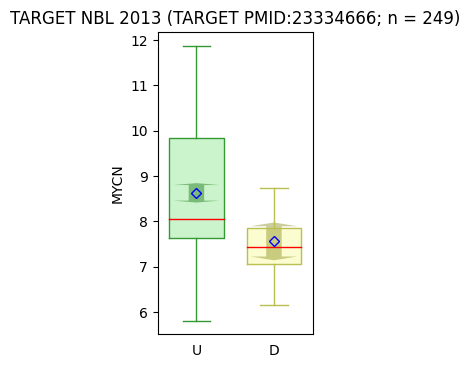

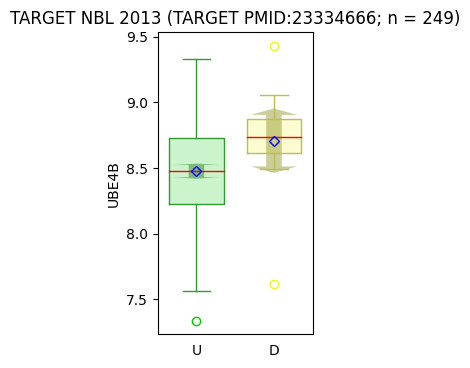

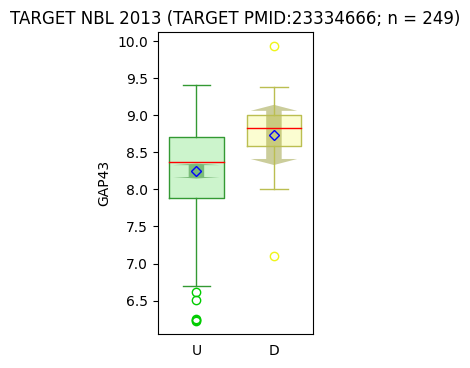

In [12]:
import HegemonUtil as hu
reload(hu)
import bone
reload(bone)
ana = bone.NBAnalysis()
ana.getTARGET2013()
ax, bp = ana.printGene("MYCN", None,{'w':2, 'h':4, 'vert': 1})
ax, bp = ana.printGene("UBE4B", None,{'w':2, 'h':4, 'vert': 1})
ax, bp = ana.printGene("GAP43", None,{'w':2, 'h':4, 'vert': 1})

## Figure 2B

[562, 734, 585, 38, 32, 23, 1187, 1208, 90, 15, 31, 6, 1, 1194, 1442, 23, 3, 1233, 42, 44, 1, 3668, 593, 1204, 90, 15, 31, 6, 1, 32, 17, 20]
[90, 1208, 734, 585]
[55, 701, 357, 331]
[-2, -1, 1, 2]
Zage 2020 Cells (n = 56)
Peter Zage http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB14
8 [4, 4] Peter Zage http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB14 NB14
[50, 654, 341, 313]
ROC-AUC 1.00
[196.1021314977097, 65.75787552414553, 195.6021314977097, 196.6021314977097]
41.97104604684205 154.13108545086766
Zage 2020 Cells (n = 56)
Peter Zage http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB14
8 [4, 4] Peter Zage http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB14 NB14
[50, 654, 341, 313]
ROC-AUC 1.00
[-0.6374366826229974, 156.68055274265495, -1.1374366826229974, -0.13743668262299735]
41.97104604684205 -42.608482729465045
Zage 2020 Cells (n = 56)
Peter Zage http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB14
6 [3, 3] Peter Zage http://hegemon.ucsd.edu/Tools/explore

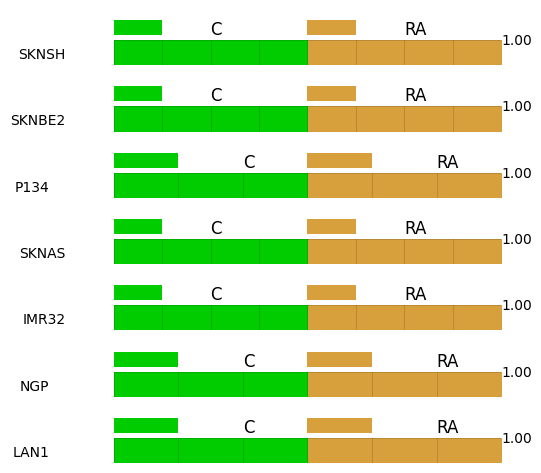

In [22]:
import HegemonUtil as hu
reload(hu)
import bone
reload(bone)
def process(ana, lt1, wt1, fthr, ax, desc):
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, lt1, wt1, fthr=fthr)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes),
             'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
             'w': 5, 'h': 0.8, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, res)
    ax.text(-1, 2, desc, horizontalalignment='right', verticalalignment='center')

fig = plt.figure(figsize=(5,6), dpi=100)
n1 = 7
axlist = []
for i in range(n1):
    ax = plt.subplot2grid((n1, 1), (i, 0))
    axlist.extend([ax])

nx = [0, 10, 9, 8, 7, 1, 2, 3, 4, 5, 22, 14]
order = [3, 4, 5, 6]
wt1 = [-2, -1, 1, 2]
genes, wt1, lt1 = bone.getNBGeneGroups([nx[i] for i in order], wt1, 0)

list1 = ['SKNSH', 'SKNBE2', 'P134', 'SKNAS', 'IMR32', 'NGP', 'LAN1']
for i in range(1, 8):
    ana = bone.NBAnalysis()
    ana.getZage2020(3 + i)
    process(ana, lt1, wt1, "thr0", axlist[i-1], list1[i-1])


## Figure 2C:

[562, 734, 585, 38, 32, 23, 1187, 1208, 90, 15, 31, 6, 1, 1194, 1442, 23, 3, 1233, 42, 44, 1, 3668, 593, 1204, 90, 15, 31, 6, 1, 32, 17, 20]
[90, 1208, 734, 585]
[55, 701, 357, 331]
[-2, -1, 1, 2]
Nishida 2008 nb (n = 86)
GSE9169 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB17
14 [7, 7] GSE9169 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB17 NB17
[126, 1322, 863, 909]
ROC-AUC 0.57
[-312.0806721822578, 8.258886567797969, -312.5806721822578, -311.5806721822578]
69.2948814253565 -381.3755536076143
Nishida 2008 nb (n = 86)
GSE9169 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB17
14 [7, 7] GSE9169 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB17 NB17
[126, 1322, 863, 909]
ROC-AUC 0.88
[-37.82290185675153, 8.287717785914761, -38.32290185675153, -37.32290185675153]
69.2948814253565 -107.11778328210802
Nishida 2008 nb (n = 86)
GSE9169 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB17
14 [7, 7] GSE9169 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=

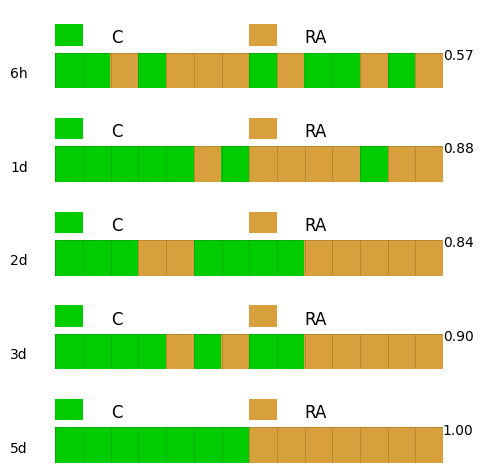

In [23]:
import HegemonUtil as hu
reload(hu)
import bone
reload(bone)
def process(ana, lt1, wt1, fthr, ax, desc):
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, lt1, wt1, fthr=fthr)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes),
             'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
             'w': 5, 'h': 0.8, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, res)
    ax.text(-1, 2, desc, horizontalalignment='right', verticalalignment='center')

fig = plt.figure(figsize=(5,6), dpi=100)
n1 = 5
axlist = []
for i in range(n1):
    ax = plt.subplot2grid((n1, 1), (i, 0))
    axlist.extend([ax])

nx = [0, 10, 9, 8, 7, 1, 2, 3, 4, 5, 22, 14]
order = [3, 4, 5, 6]
wt1 = [-2, -1, 1, 2]
genes, wt1, lt1 = bone.getNBGeneGroups([nx[i] for i in order], wt1, 0)

list1 = ['6h', '1d', '2d', '3d', '5d']
list2 = [0.25, 1, 2, 3, 5]
for i in range(5):
    ana = bone.NBAnalysis()
    ana.getNishida2008Df(2, list2[i])
    process(ana, lt1, wt1, "thr0", axlist[i], list1[i])


## Figure 2D:

[562, 734, 585, 38, 32, 23, 1187, 1208, 90, 15, 31, 6, 1, 1194, 1442, 23, 3, 1233, 42, 44, 1, 3668, 593, 1204, 90, 15, 31, 6, 1, 32, 17, 20]
[90, 1208, 734, 585]
[55, 701, 357, 331]
[-2, -1, 1, 2]
Claeys 2019 nb RNASeq (n = 12)
GSE95189 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB22.2
9 [3, 3, 3] GSE95189 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB22.2 NB22.2
[57, 674, 351, 319]
ROC-AUC 0.44
[-358.62850635563876, 3.0740852016706817, -359.12850635563876, -358.12850635563876]
37.46054334981094 -396.0890497054497
Westerlund 2017 nb 2 (n = 54)
GSE100568 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB23.2
10 [5, 5] GSE100568 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB23.2 NB23.2
[54, 706, 359, 329]
ROC-AUC 1.00
[100.12854383719076, 9.15303306408997, 99.62854383719076, 100.62854383719076]
67.43199869720266 32.6965451399881
Frumm 2013 nb (n = 35)
GSE45587 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB24
11 [5, 6] GSE45587 http://hegemon.ucsd.edu/

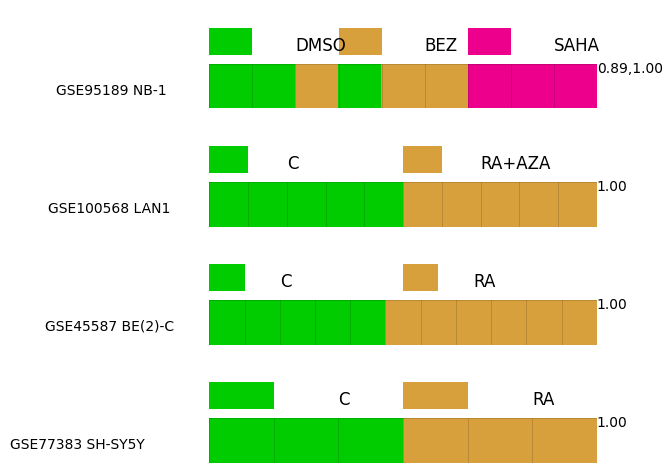

In [67]:
import HegemonUtil as hu
reload(hu)
import bone
reload(bone)
def process(ana, lt1, wt1, fthr, ax, desc):
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, lt1, wt1, fthr=fthr)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes),
             'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
             'w': 5, 'h': 0.8, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    ax.text(-1, 2, desc, horizontalalignment='right', verticalalignment='center')

fig = plt.figure(figsize=(5,6), dpi=100)
n1 = 4
axlist = []
for i in range(n1):
    ax = plt.subplot2grid((n1, 1), (i, 0))
    axlist.extend([ax])

nx = [0, 10, 9, 8, 7, 1, 2, 3, 4, 5, 22, 14]
order = [3, 4, 5, 6]
wt1 = [-2, -1, 1, 2]
genes, wt1, lt1 = bone.getNBGeneGroups([nx[i] for i in order], wt1, 0)

ana = bone.NBAnalysis()
ana.getClaeys2019II(2)
process(ana, lt1, wt1, "thr0", axlist[0], "GSE95189 NB-1")

ana = bone.NBAnalysis()
ana.getWesterlund2017II(4)
process(ana, lt1, wt1, "thr0", axlist[1], "GSE100568 LAN1")

ana = bone.NBAnalysis()
ana.getFrumm2013(2)
process(ana, lt1, wt1, "thr0", axlist[2], "GSE45587 BE(2)-C")

ana = bone.NBAnalysis()
ana.getPezzini2017()
process(ana, lt1, wt1, "thr0", axlist[3], "GSE77383 SH-SY5Y")


## Figure 2E-G

[562, 734, 585, 38, 32, 23, 1187, 1208, 90, 15, 31, 6, 1, 1194, 1442, 23, 3, 1233, 42, 44, 1, 3668, 593, 1204, 90, 15, 31, 6, 1, 32, 17, 20]
[90, 1208, 734, 585]
[55, 701, 357, 331]
[-2, -1, 1, 2]
Ackermann 2018 NB (n = 394)
GSE120572 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB9
310 [32, 278] GSE120572 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB9 NB9
[67, 1008, 558, 494]
ROC-AUC 0.83
[164.55553054848673, 258.6956426988242, 164.05553054848673, 165.05553054848673]
104.22049667809362 60.335033870393104
TERT r+ vs TERT r- -9.07, 3.8e-12
TARGET NBL 2013 (n = 249)
TARGET PMID:23334666 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB12
183 [170, 13] TARGET PMID:23334666 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB12 NB12
[47, 662, 332, 295]
ROC-AUC 0.83
[-61.718211499687555, 167.50387368888, -62.218211499687555, -61.218211499687555]
61.31758943686184 -123.03580093654939
U vs D -6.67, 2.92e-06
Ohtaki 2010 nb (n = 51)
GSE16237 http://hegemon.ucsd.edu/Tools/

../bone.py:429: RuntimeWarning: invalid value encountered in greater
  v1 = [g_ind, sum(v > t)]
../bone.py:433: RuntimeWarning: invalid value encountered in greater
  v1 = [g_ind, sum(v > t)]


[126, 1322, 863, 909]
ROC-AUC 0.79
[24.23022354577327, 35.421066887630516, 23.73022354577327, 24.73022354577327]
nan nan
D vs A -3.04, 0.0089


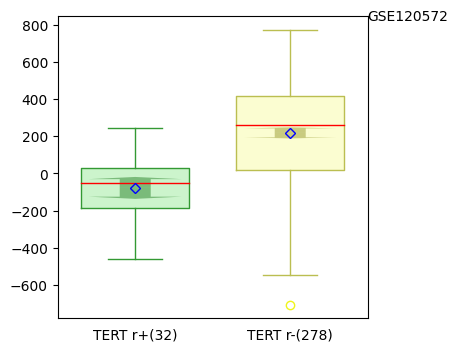

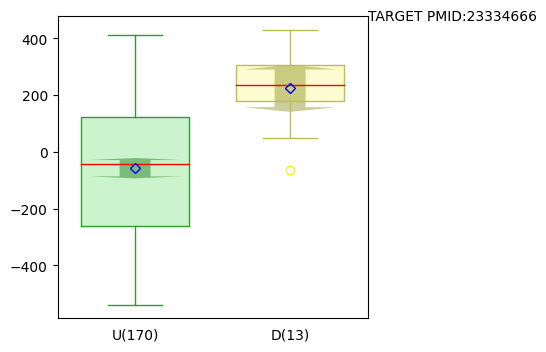

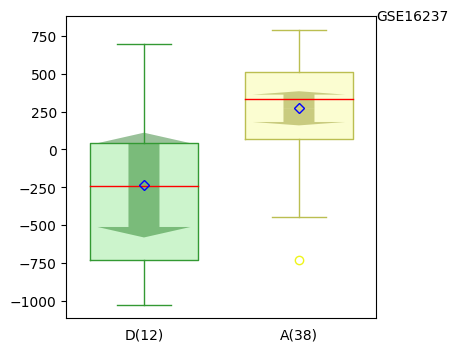

In [99]:
import HegemonUtil as hu
reload(hu)
import bone
reload(bone)
nx = [0, 10, 9, 8, 7, 1, 2, 3, 4, 5, 22, 14]
order = [3, 4, 5, 6]
wt1 = [-2, -1, 1, 2]
genes, wt1, lt1 = bone.getNBGeneGroups([nx[i] for i in order], wt1, 0)
fthr="thr0"

ana = bone.NBAnalysis()
ana.getAckermann2018(2)
ana.atypes = ['TERT r+', 'TERT r-']
c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, lt1, wt1, fthr=fthr)
ax, bp = ana.printScores(None,{'w':4, 'h':4, 'vert': 1})
ana.printAllPvals()

ana = bone.NBAnalysis()
ana.getTARGET2013()
c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, lt1, wt1, fthr=fthr)
ax, bp = ana.printScores(None,{'w':4, 'h':4, 'vert': 1})
ana.printAllPvals()

ana = bone.NBAnalysis()
ana.getOhtaki2010Df(2)
c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, lt1, wt1, fthr=fthr)
ax, bp = ana.printScores(None,{'w':4, 'h':4, 'vert': 1})
ana.printAllPvals()


## Figure 2H

[562, 734, 585, 38, 32, 23, 1187, 1208, 90, 15, 31, 6, 1, 1194, 1442, 23, 3, 1233, 42, 44, 1, 3668, 593, 1204, 90, 15, 31, 6, 1, 32, 17, 20]
[90, 1208, 734, 585]
[55, 701, 357, 331]
[-2, -1, 1, 2]
Zhang 2014 RNASeq NB (n = 498)
GSE62564 GSE49711 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB4
498 [393, 105] GSE62564 GSE49711 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB4 NB4
[89, 1217, 773, 675]
[-148.07247268682903, 476.28778281176, -148.57247268682903, -147.57247268682903]
204.0190977334266 55.946625046597575


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Zhang 2014 RNASeq NB (GSE62564 GSE49711; n = 498)')

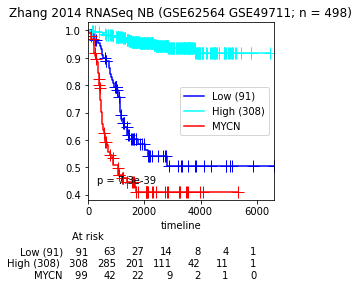

In [7]:
import HegemonUtil as hu
reload(hu)
import bone
reload(bone)
nx = [0, 10, 9, 8, 7, 1, 2, 3, 4, 5, 22, 14]
order = [3, 4, 5, 6]
wt1 = [-2, -1, 1, 2]
genes, wt1, lt1 = bone.getNBGeneGroups([nx[i] for i in order], wt1, 0)
ana = bone.NBAnalysis()
ana.getSurvival("NB4")
ana.orderData(lt1, wt1)
mycn = ana.h.getSurvName("c mycn status")
high = [i for i in ana.h.aRange() if mycn[i] == '1']
low = [i for i in ana.h.aRange() if mycn[i] == '0']
id1 = "MYCN"
low = ana.h.getArraysAll(id1, "thr0", "lo")
high = ana.h.getArraysAll(id1, "thr0", "hi")
id1 = "UBE4B"
g3 = ana.h.getArraysAll(id1, "thr2", "lo")
g4 = ana.h.getArraysAll(id1, "thr2", "hi")

thr = hu.getThrData(ana.f_ranks)
nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/16
print(thr)
print(nm, thr[0] + nm)
g1 = [i for i in low if
        ana.f_ranks[i - ana.h.start] < thr[0] + 1 * nm]
g2 = [i for i in low if
        ana.f_ranks[i - ana.h.start] >= thr[0] + 1 * nm]
pG = [ ["Low", "blue", g1], ["High", "cyan", g2], ["MYCN", "red", high]]
#pG = [ ["Low", "green", low], ["High", "red", high]]
#pG = [ ["Low", "green", g3], ["High", "red", g4], ["MYCN", "cyan", high]]
for i in range(2):
    pG[i][2] = [k for k in pG[i][2] if k in low]
    pG[i][0] += " (" + str(len(pG[i][2])) + ")"
time = ana.h.getSurvName('time')
status = ana.h.getSurvName('status')
sax = hu.survival(time, status, pG)
sax.set_title(ana.h.getTitle())

[562, 734, 585, 38, 32, 23, 1187, 1208, 90, 15, 31, 6, 1, 1194, 1442, 23, 3, 1233, 42, 44, 1, 3668, 593, 1204, 90, 15, 31, 6, 1, 32, 17, 20]
[90, 1208, 734, 585]
[55, 701, 357, 331]
[-2, -1, 1, 2]
Zhang 2014 RNASeq NB (n = 498)
GSE62564 GSE49711 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB4
498 [393, 105] GSE62564 GSE49711 http://hegemon.ucsd.edu/Tools/explore.php?key=nb&id=NB4 NB4
[89, 1217, 773, 675]
[-148.07247268682897, 476.2877828117574, -148.57247268682897, -147.57247268682897]
204.01909773342663 55.94662504659766


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Zhang 2014 RNASeq NB (GSE62564 GSE49711; n = 498)')

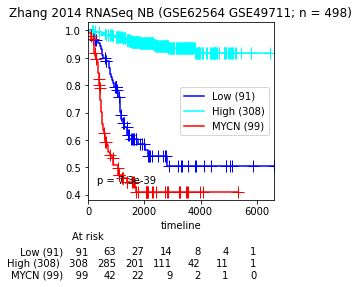

In [16]:
import HegemonUtil as hu
reload(hu)
import bone
reload(bone)
nx = [0, 10, 9, 8, 7, 1, 2, 3, 4, 5, 22, 14]
order = [3, 4, 5, 6]
wt1 = [-2, -1, 1, 2]
genes, wt1, lt1 = bone.getNBGeneGroups([nx[i] for i in order], wt1, 0)
ana = bone.NBAnalysis()
ana.getSurvivalDf("NB4")
ana.orderDataDf(lt1, wt1)
mycn = ana.getSurvName("c mycn status")
high = [i for i in range(len(mycn)) if mycn[i] == '1']
low = [i for i in range(len(mycn)) if mycn[i] == '0']
dobj = hu.getHegemonData(ana.dbid, "MYCN", "")
tobj = hu.getHegemonThr(ana.dbid, "MYCN", "")
low = [i for i in ana.aRange() if float(dobj[1][i]) < float(tobj[0][3])]
high = [i for i in ana.aRange() if float(dobj[1][i]) >= float(tobj[0][3])]

thr = hu.getThrData(ana.f_ranks)
nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/16
print(thr)
print(nm, thr[0] + nm)
g1 = [i for i in low if
        ana.f_ranks[i - ana.start] < thr[0] + 1 * nm]
g2 = [i for i in low if
        ana.f_ranks[i - ana.start] >= thr[0] + 1 * nm]
pG = [ ["Low", "blue", g1], ["High", "cyan", g2], ["MYCN", "red", high]]
#pG = [ ["Low", "green", low], ["High", "red", high]]
#pG = [ ["Low", "green", g3], ["High", "red", g4], ["MYCN", "cyan", high]]
for i in range(2):
    pG[i][2] = [k for k in pG[i][2] if k in low]
for i in range(3):
    pG[i][0] += " (" + str(len(pG[i][2])) + ")"
time = ana.getSurvName('time')
status = ana.getSurvName('status')
sax = hu.survival(time, status, pG)
sax.set_title(ana.getTitle())